<a href="https://colab.research.google.com/github/mumtazsakho/mumtazsakho/blob/main/Verifikasi_tanda_tangan_menggunakan_siamese_convolutional_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
try:
  %tensorflow_version 2.x
except Exception:
  pass

import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Flatten, Dense, Dropout, Lambda
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.utils import plot_model
from tensorflow.keras import backend as K

import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageFont, ImageDraw
import random

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [ ]:
import matplotlib.pyplot as plt
from matplotlib.image import imread

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Ambil data dari drive

In [ ]:
import os
# buat list untuk menampung path dari gambar tanda tangan per orang
sakho = []
bintang = []
rafif = []
base = '/content/drive/MyDrive/Data tanda tangan'
for i in os.listdir('/content/drive/MyDrive/Data tanda tangan/sakho3'):
  sakho.append(base+'/sakho3/'+i)

for i in os.listdir('/content/drive/MyDrive/Data tanda tangan/bintang3'):
  bintang.append(base+'/bintang3/'+i)

for i in os.listdir('/content/drive/MyDrive/Data tanda tangan/Rafif'):
  rafif.append(base+'/Rafif/'+i)

sakho1 = sakho[:8]
sakho2 = sakho[8:16]

rafif1 = rafif[:8]
rafif2 = rafif[8:16]

bintang1 = bintang[:8]
bintang2 = bintang[8:16]

In [ ]:
sakho[:5]

['/content/drive/MyDrive/Data tanda tangan/sakho3/gambar1.png',
 '/content/drive/MyDrive/Data tanda tangan/sakho3/gambar2.png',
 '/content/drive/MyDrive/Data tanda tangan/sakho3/gambar3.png',
 '/content/drive/MyDrive/Data tanda tangan/sakho3/gambar4.png',
 '/content/drive/MyDrive/Data tanda tangan/sakho3/gambar5.png']

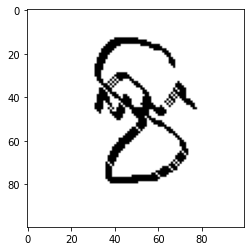

In [ ]:
#visualisasi
# imread digunakan untuk mengambil array dari gambar
# plt.imshow digunakan utk visualisasiin gambar
plt.imshow(imread(sakho[0]))

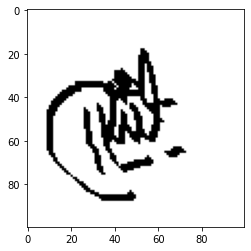

In [ ]:
plt.imshow(imread(rafif[22]))

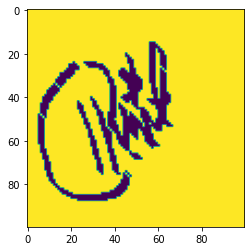

In [ ]:
plt.imshow(imread(rafif[12])[:,:,0])

In [ ]:
imread(rafif[12])[:,:,0].shape

(100, 100)

In [ ]:
imread(rafif[12]).shape

(100, 100, 3)

In [ ]:
imread(rafif[2]).shape

(100, 100, 3)

### Buat pasangan kembar

In [ ]:
# buat pasangan gambar yg mirip (positif)
# misal ==> [gambarRafif1, gambarRafif2], [gambarRafif1, gambarRafif3].....

mix_rafif1 = []
for i in rafif1:
  for j in rafif1:
    mix_rafif1.append([[i],[j]])

mix_rafif2 = []
for i in rafif2:
  for j in rafif2:
    mix_rafif2.append([[i],[j]])

In [ ]:
mix_rafif1

[[['/content/drive/MyDrive/Data tanda tangan/Rafif/gambar5.png'],
  ['/content/drive/MyDrive/Data tanda tangan/Rafif/gambar5.png']],
 [['/content/drive/MyDrive/Data tanda tangan/Rafif/gambar5.png'],
  ['/content/drive/MyDrive/Data tanda tangan/Rafif/gambar6.png']],
 [['/content/drive/MyDrive/Data tanda tangan/Rafif/gambar5.png'],
  ['/content/drive/MyDrive/Data tanda tangan/Rafif/gambar7.png']],
 [['/content/drive/MyDrive/Data tanda tangan/Rafif/gambar5.png'],
  ['/content/drive/MyDrive/Data tanda tangan/Rafif/gambar8.png']],
 [['/content/drive/MyDrive/Data tanda tangan/Rafif/gambar5.png'],
  ['/content/drive/MyDrive/Data tanda tangan/Rafif/gambar9.png']],
 [['/content/drive/MyDrive/Data tanda tangan/Rafif/gambar5.png'],
  ['/content/drive/MyDrive/Data tanda tangan/Rafif/gambar10.png']],
 [['/content/drive/MyDrive/Data tanda tangan/Rafif/gambar5.png'],
  ['/content/drive/MyDrive/Data tanda tangan/Rafif/gambar11.png']],
 [['/content/drive/MyDrive/Data tanda tangan/Rafif/gambar5.png'],
 

In [ ]:
mix_sakho1 = []
for i in sakho1:
  for j in sakho1:
    mix_sakho1.append([[i],[j]])

mix_sakho2 = []
for i in sakho2:
  for j in sakho2:
    mix_sakho2.append([[i],[j]])

In [ ]:
len(mix_sakho2)

1764

In [ ]:
mix_bintang1 = []
for i in bintang1:
  for j in bintang1:
    mix_bintang1.append([[i],[j]])

mix_bintang2 = []
for i in bintang2:
  for j in bintang2:
    mix_bintang2.append([[i],[j]])

In [ ]:
len(mix_bintang1)

64

In [ ]:
mix_rafif1.extend(mix_sakho1)
mix_rafif1.extend(mix_bintang1)

mix_rafif2.extend(mix_sakho2)
mix_rafif2.extend(mix_bintang2)

In [ ]:
#len(mix_rafif)
kembar1 = mix_rafif1
kembar2 = mix_rafif2
len(kembar2)

192

### Buat pasangan tidak kembar

In [ ]:
gak_kembar1 = []
for i in sakho1:
  for j in rafif1:
    gak_kembar1.append([[i],[j]])

for i in sakho1:
  for j in bintang1:
    gak_kembar1.append([[i],[j]])

for i in rafif1:
  for j in bintang1:
    gak_kembar1.append([[i],[j]]) 


gak_kembar2 = []
for i in sakho2:
  for j in rafif2:
    gak_kembar2.append([[i],[j]])

for i in sakho2:
  for j in bintang2:
    gak_kembar2.append([[i],[j]])

for i in rafif2:
  for j in bintang2:
    gak_kembar2.append([[i],[j]]) 

In [ ]:
np.array(gak_kembar1)

array([[['/content/drive/MyDrive/Data tanda tangan/sakho3/gambar1.png'],
        ['/content/drive/MyDrive/Data tanda tangan/Rafif/gambar5.png']],

       [['/content/drive/MyDrive/Data tanda tangan/sakho3/gambar1.png'],
        ['/content/drive/MyDrive/Data tanda tangan/Rafif/gambar6.png']],

       [['/content/drive/MyDrive/Data tanda tangan/sakho3/gambar1.png'],
        ['/content/drive/MyDrive/Data tanda tangan/Rafif/gambar7.png']],

       [['/content/drive/MyDrive/Data tanda tangan/sakho3/gambar1.png'],
        ['/content/drive/MyDrive/Data tanda tangan/Rafif/gambar8.png']],

       [['/content/drive/MyDrive/Data tanda tangan/sakho3/gambar1.png'],
        ['/content/drive/MyDrive/Data tanda tangan/Rafif/gambar9.png']],

       [['/content/drive/MyDrive/Data tanda tangan/sakho3/gambar1.png'],
        ['/content/drive/MyDrive/Data tanda tangan/Rafif/gambar10.png']],

       [['/content/drive/MyDrive/Data tanda tangan/sakho3/gambar1.png'],
        ['/content/drive/MyDrive/Data tanda 

### Buat label mirip (1) / tidak mirip (0)

In [ ]:
neg1 = np.zeros(len(gak_kembar1))
neg2 = np.zeros(len(gak_kembar2))
neg1

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.])

In [ ]:
pos1 = np.ones(len(kembar1))
pos2 = np.ones(len(kembar2))

### splitting data

In [ ]:
from sklearn.model_selection import train_test_split
#positif paling awal
pos1 = list(pos1)
neg1 = list(neg1)
pos1.extend(list(neg1))
y1 = pos1

pos2 = list(pos2)
neg2 = list(neg2)
pos2.extend(list(neg2))
y2 = pos2
# kembar paling awal
kembar1.extend(list(gak_kembar1))
x1 = kembar1

kembar2.extend(list(gak_kembar2))
x2 = kembar2


# train_image, test_image, train_y, test_y = train_test_split(x, y, random_state=100, test_size=0.2)

In [ ]:
# print(train_y[3])
# print(train_image[3])

0.0
[['/content/drive/MyDrive/Data tanda tangan/Rafif/gambar32.png'], ['/content/drive/MyDrive/Data tanda tangan/bintang3/gambar7.png']]


In [ ]:
import pandas as pd
# biar gak pusing liat arraynya, jd dibuat dataframe
df_train = pd.DataFrame(x1)
df_train = df_train.rename(columns={0:'pair1',1:'pair2'})
df_train['label'] =  y1
df_train

,pair1,pair2,label
0,[/content/drive/MyDrive/Data tanda tangan/Rafi...,[/content/drive/MyDrive/Data tanda tangan/Rafi...,1.0
1,[/content/drive/MyDrive/Data tanda tangan/Rafi...,[/content/drive/MyDrive/Data tanda tangan/Rafi...,1.0
2,[/content/drive/MyDrive/Data tanda tangan/Rafi...,[/content/drive/MyDrive/Data tanda tangan/Rafi...,1.0
3,[/content/drive/MyDrive/Data tanda tangan/Rafi...,[/content/drive/MyDrive/Data tanda tangan/Rafi...,1.0
4,[/content/drive/MyDrive/Data tanda tangan/Rafi...,[/content/drive/MyDrive/Data tanda tangan/Rafi...,1.0
...,...,...,...
379,[/content/drive/MyDrive/Data tanda tangan/Rafi...,[/content/drive/MyDrive/Data tanda tangan/bint...,0.0
380,[/content/drive/MyDrive/Data tanda tangan/Rafi...,[/content/drive/MyDrive/Data tanda tangan/bint...,0.0
381,[/content/drive/MyDrive/Data tanda tangan/Rafi...,[/content/drive/MyDrive/Data tanda tangan/bint...,0.0
382,[/content/drive/MyDrive/Data tanda tangan/Rafi...,[/content/drive/MyDrive/Data tanda tangan/bint...,0.0


In [ ]:
df_test = pd.DataFrame(x2)
df_test = df_test.rename(columns={0:'pair1',1:'pair2'})
df_test['label'] =  y2
df_test

,pair1,pair2,label
0,[/content/drive/MyDrive/Data tanda tangan/Rafi...,[/content/drive/MyDrive/Data tanda tangan/Rafi...,1.0
1,[/content/drive/MyDrive/Data tanda tangan/Rafi...,[/content/drive/MyDrive/Data tanda tangan/Rafi...,1.0
2,[/content/drive/MyDrive/Data tanda tangan/Rafi...,[/content/drive/MyDrive/Data tanda tangan/Rafi...,1.0
3,[/content/drive/MyDrive/Data tanda tangan/Rafi...,[/content/drive/MyDrive/Data tanda tangan/Rafi...,1.0
4,[/content/drive/MyDrive/Data tanda tangan/Rafi...,[/content/drive/MyDrive/Data tanda tangan/Rafi...,1.0
...,...,...,...
379,[/content/drive/MyDrive/Data tanda tangan/Rafi...,[/content/drive/MyDrive/Data tanda tangan/bint...,0.0
380,[/content/drive/MyDrive/Data tanda tangan/Rafi...,[/content/drive/MyDrive/Data tanda tangan/bint...,0.0
381,[/content/drive/MyDrive/Data tanda tangan/Rafi...,[/content/drive/MyDrive/Data tanda tangan/bint...,0.0
382,[/content/drive/MyDrive/Data tanda tangan/Rafi...,[/content/drive/MyDrive/Data tanda tangan/bint...,0.0


In [ ]:
# ini function untuk ngubah path gambar jadi array
def convertArray(data, grayscale=False):
  if grayscale==True:
    img = io.imread(data[0])
    imgGray = color.rgb2gray(img)
    return imgGray
  else:
    return imread(data[0])

In [ ]:
df_train['arr_pair1'] = df_train['pair1'].apply(convertArray)

In [ ]:
df_train

,pair1,pair2,label,arr_pair1
0,[/content/drive/MyDrive/Data tanda tangan/Rafi...,[/content/drive/MyDrive/Data tanda tangan/Rafi...,1.0,"[[[1.0, 1.0, 1.0], [1.0, 1.0, 1.0], [1.0, 1.0,..."
1,[/content/drive/MyDrive/Data tanda tangan/sakh...,[/content/drive/MyDrive/Data tanda tangan/Rafi...,0.0,"[[[1.0, 1.0, 1.0], [1.0, 1.0, 1.0], [1.0, 1.0,..."
2,[/content/drive/MyDrive/Data tanda tangan/sakh...,[/content/drive/MyDrive/Data tanda tangan/Rafi...,0.0,"[[[1.0, 1.0, 1.0], [1.0, 1.0, 1.0], [1.0, 1.0,..."
3,[/content/drive/MyDrive/Data tanda tangan/Rafi...,[/content/drive/MyDrive/Data tanda tangan/bint...,0.0,"[[[1.0, 1.0, 1.0], [1.0, 1.0, 1.0], [1.0, 1.0,..."
4,[/content/drive/MyDrive/Data tanda tangan/sakh...,[/content/drive/MyDrive/Data tanda tangan/Rafi...,0.0,"[[[1.0, 1.0, 1.0], [1.0, 1.0, 1.0], [1.0, 1.0,..."
...,...,...,...,...
7915,[/content/drive/MyDrive/Data tanda tangan/Rafi...,[/content/drive/MyDrive/Data tanda tangan/Rafi...,1.0,"[[[1.0, 1.0, 1.0], [1.0, 1.0, 1.0], [1.0, 1.0,..."
7916,[/content/drive/MyDrive/Data tanda tangan/Rafi...,[/content/drive/MyDrive/Data tanda tangan/Rafi...,1.0,"[[[1.0, 1.0, 1.0], [1.0, 1.0, 1.0], [1.0, 1.0,..."
7917,[/content/drive/MyDrive/Data tanda tangan/sakh...,[/content/drive/MyDrive/Data tanda tangan/bint...,0.0,"[[[1.0, 1.0, 1.0], [1.0, 1.0, 1.0], [1.0, 1.0,..."
7918,[/content/drive/MyDrive/Data tanda tangan/sakh...,[/content/drive/MyDrive/Data tanda tangan/Rafi...,0.0,"[[[1.0, 1.0, 1.0], [1.0, 1.0, 1.0], [1.0, 1.0,..."


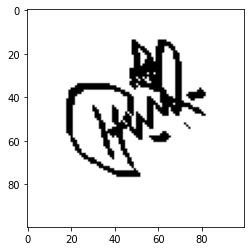

In [ ]:
plt.imshow(df_train['arr_pair1'][0])

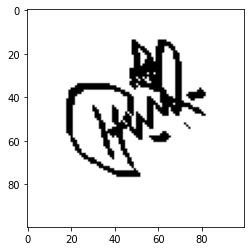

In [ ]:
plt.imshow(df_train['arr_pair1'][1])

In [ ]:
df_train['arr_pair1'][1].shape

(100, 100, 3)

In [ ]:
df_train['arr_pair2'] = df_train['pair2'].apply(convertArray)

In [ ]:
df_test['arr_pair1'] = df_test['pair1'].apply(convertArray)
df_test['arr_pair2'] = df_test['pair2'].apply(convertArray)

### Arsitektur Model (Siamese Network)

In [ ]:
def initialize_base_network():
    input = Input(shape=(100, 100, 3), name="base_input")
    x = tf.keras.layers.Conv2D(2, kernel_size=11, strides=1, activation='relu')(input)
    x = tf.keras.layers.MaxPooling2D(3, strides=2)(x)

    x = tf.keras.layers.Conv2D(2, kernel_size=5, strides=1, activation='relu')(x)
    x = tf.keras.layers.MaxPooling2D(3, strides=2)(x)

    x = tf.keras.layers.Conv2D(2,kernel_size=3, strides=1 ,activation='relu')(x)
    x = tf.keras.layers.MaxPooling2D(3, strides=2)(x)

    x = Flatten(name="flatten_input")(x)
    x = Dense(512, activation='relu', name="dense1")(x)
    x = Dropout(0.1, name="dropout1")(x)
    x = Dense(256, activation='relu', name="dense2")(x)
    x = Dropout(0.1, name="dropout2")(x)
    x = Dense(128, activation='relu', name="dense3")(x)

    return Model(inputs=input, outputs=x)


def euclidean_distance(vects):
    x, y = vects
    sum_square = K.sum(K.square(x - y), axis=1, keepdims=True)
    return K.sqrt(K.maximum(sum_square, K.epsilon()))


def eucl_dist_output_shape(shapes):
    shape1, shape2 = shapes
    return (shape1[0], 1)

In [ ]:
base_network = initialize_base_network()

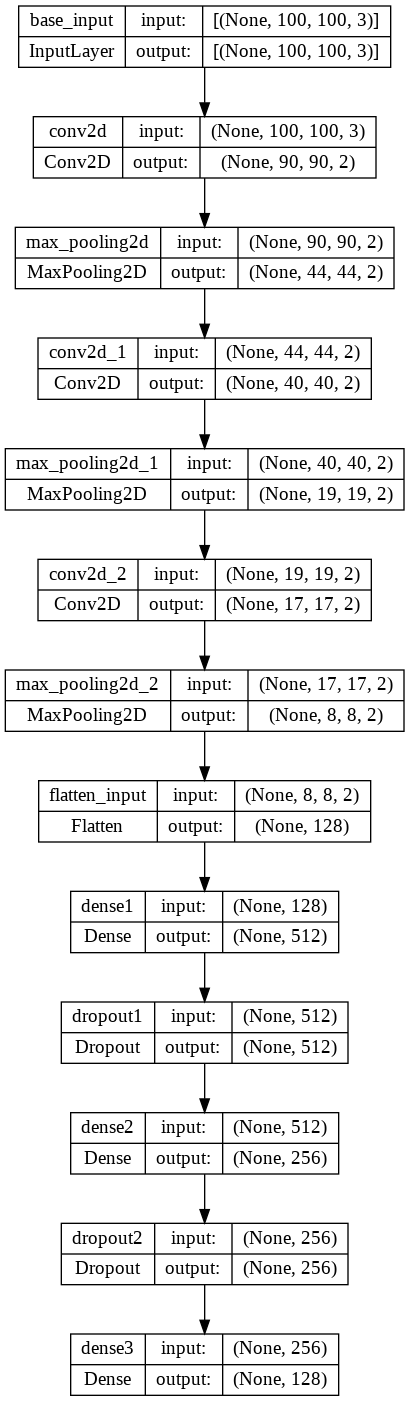

In [ ]:
plot_model(base_network, show_shapes=True, show_layer_names=True, to_file='outer-model1.png')

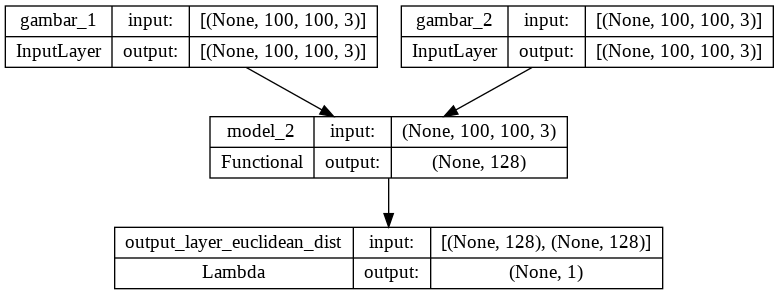

In [ ]:
input_a = Input(shape=(100,100,3), name="gambar_1")
vect_output_a = base_network(input_a)

input_b = Input(shape=(100,100,3), name="gambar_2")
vect_output_b = base_network(input_b)

output = Lambda(euclidean_distance, name="output_layer_euclidean_dist", output_shape=eucl_dist_output_shape)([vect_output_a, vect_output_b])

model = Model([input_a, input_b], output)

plot_model(model, show_shapes=True, show_layer_names=True, to_file='outer-model.png')

In [ ]:
def contrastive_loss_with_margin(margin):
    def contrastive_loss(y_true, y_pred):
        '''Contrastive loss dari Hadsell-et-al.'06
        http://yann.lecun.com/exdb/publis/pdf/hadsell-chopra-lecun-06.pdf
        '''
        square_pred = K.square(y_pred)
        margin_square = K.square(K.maximum(margin - y_pred, 0))
        return (y_true * square_pred + (1 - y_true) * margin_square)
    return contrastive_loss

In [ ]:
y1 = np.array(y1).astype('float32')
y2 = np.array(y2).astype('float32')

In [ ]:
df_train['arr_pair1'][0].shape

(100, 100, 3)

In [ ]:
# kolom arr_pair1 dari data training diubah jadi array
arr_xtrainp1 = []
for i in df_train['arr_pair1']:
  arr_xtrainp1.append(i)
arr_xtrainp1 = np.array(arr_xtrainp1).astype('float32')
print(arr_xtrainp1.shape)

# kolom arr_pair2 dari data training diubah jadi array
arr_xtrainp2 = []
for i in df_train['arr_pair2']:
  arr_xtrainp2.append(i)
arr_xtrainp2 = np.array(arr_xtrainp2).astype('float32')
print(arr_xtrainp2.shape)

(384, 100, 100, 3)
(384, 100, 100, 3)


In [ ]:
# kolom arr_pair1 dari data training diubah jadi array
arr_xtestp1 = []
for i in df_test['arr_pair1']:
  arr_xtestp1.append(i)
arr_xtestp1 = np.array(arr_xtestp1).astype('float32')
print(arr_xtestp1.shape)

# kolom arr_pair2 dari data training diubah jadi array
arr_xtestp2 = []
for i in df_test['arr_pair2']:
  arr_xtestp2.append(i)
arr_xtestp2 = np.array(arr_xtestp2).astype('float32')
print(arr_xtestp2.shape)

(384, 100, 100, 3)
(384, 100, 100, 3)


In [ ]:
# Proses latihan
adam = tf.keras.optimizers.Adam(lr=0.0008)
model.compile(loss=contrastive_loss_with_margin(margin=1), optimizer=adam)
history = model.fit([arr_xtrainp1, arr_xtrainp2], y1, epochs=10,
                    validation_data=([arr_xtestp1,arr_xtestp2],y2), batch_size=128)

/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/10
3/3 [==============================] - 19s 6s/step - loss: 0.3211 - val_loss: 0.3144
Epoch 2/10
3/3 [==============================] - 17s 6s/step - loss: 0.2654 - val_loss: 0.2774
Epoch 3/10
3/3 [==============================] - 17s 6s/step - loss: 0.2054 - val_loss: 0.2023
Epoch 4/10
3/3 [==============================] - 19s 7s/step - loss: 0.1540 - val_loss: 0.1596
Epoch 5/10
3/3 [==============================] - 17s 6s/step - loss: 0.1307 - val_loss: 0.1620
Epoch 6/10
3/3 [==============================] - 20s 8s/step - loss: 0.1030 - val_loss: 0.1655
Epoch 7/10
3/3 [==============================] - 18s 6s/step - loss: 0.0803 - val_loss: 0.1514
Epoch 8/10
3/3 [==============================] - 18s 6s/step - loss: 0.0565 - val_loss: 0.1423
Epoch 9/10
3/3 [==============================] - 20s 7s/step - loss: 0.0449 - val_loss: 0.1385
Epoch 10/10
3/3 [==============================] - 17s 6s/step - loss: 0.0342 - val_loss: 0.1391


In [ ]:
arr_xtrainp1.shape

(384, 100, 100, 3)

In [ ]:
arr_xtrainp1.shape

(384, 100, 100, 3)

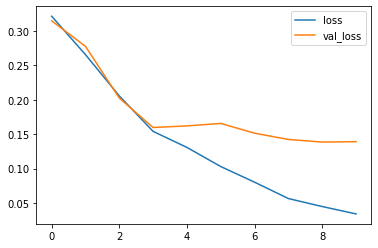

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss','val_loss'])

### Nguji Model

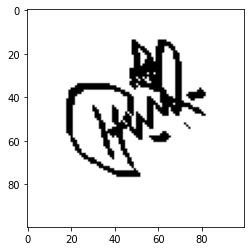

In [ ]:
plt.imshow(df_train['arr_pair1'][6])

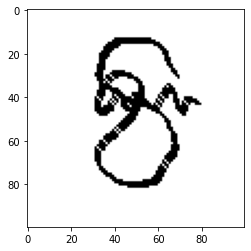

In [ ]:
plt.imshow(df_train['arr_pair1'][100])

In [ ]:
df_train['arr_pair2'][0].reshape(1,100,100,3).shape

(1, 100, 100, 3)

In [ ]:
model.predict([df_train['arr_pair1'][6].reshape(1,100,100,3),df_train['arr_pair1'][100].reshape(1,100,100,3)])

1/1 [==============================] - 0s 180ms/step


array([[0.80002505]], dtype=float32)

In [ ]:
def compute_accuracy(y_true, y_pred):
    pred = y_pred.ravel() < 0.5
    return np.mean(pred == y_true)

In [ ]:
loss = model.evaluate(x=[arr_xtrainp1, arr_xtrainp2], y=y1)

y_pred_train = model.predict([arr_xtrainp1, arr_xtrainp2])
train_accuracy = compute_accuracy(y1, y_pred_train)

y_pred_test = model.predict([arr_xtestp1, arr_xtestp2])
test_accuracy = compute_accuracy(y2, y_pred_test)

print("Loss = {}, Train Accuracy = {}, test accuracy = {}".format(loss, train_accuracy,test_accuracy))

12/12 [==============================] - 6s 475ms/step
Loss = 0.0025391881354153156, Train Accuracy = 1.0, test accuracy = 0.7760416666666666


In [ ]:
# model.save_weights('bobot_siamese3cnn_8sampel.h5')

In [ ]:
def accuracy_distribution(y_true, y_pred, test_case):
    list_acc = []
    for i in test_case:
      pred = y_pred.ravel() < i
      list_acc.append(np.mean(pred == y_true))
    return list_acc

In [ ]:
model.load_weights('/content/bobot_siamese3cnn_8sampel.h5')

In [ ]:
model.compile(loss=contrastive_loss_with_margin(margin=1), optimizer='adam')

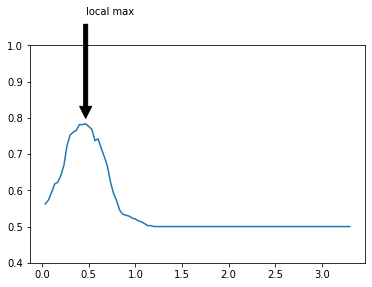

In [ ]:

acc_list = accuracy_distribution(y2, y_pred_test,test_case=np.arange(1,100)/30)
fig = plt.figure()
ax = fig.add_subplot(111)


max_acc = max(acc_list)
xpos = acc_list.index(max_acc)
xacc = np.arange(1,100)/30
xmax = xacc[xpos]
line, = ax.plot(xacc, acc_list)

ax.annotate('local max', xy=(xmax, max_acc), xytext=(xmax, max_acc+0.3),
            arrowprops=dict(facecolor='black', shrink=0.05),
            )

ax.set_ylim(min(acc_list)-0.1,1)
plt.show()
# plt.plot(xacc, acc_list)
# plt.ylabel('accuracy_test')
# plt.xlabel('threshold')
# plt.legend(['akurasi'])

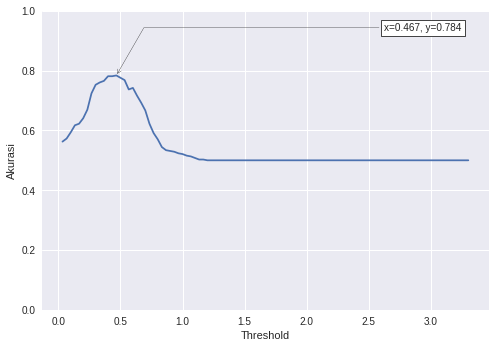

In [ ]:
plt.style.use('seaborn')
fig, ax = plt.subplots()
ax.plot(xacc, acc_list)

def annot_max(x,y, ax=None):
    xmax = x[np.argmax(y)]
    ymax = max(y)
    text= "x={:.3f}, y={:.3f}".format(xmax, ymax)
    if not ax:
        ax=plt.gca()
    bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
    arrowprops=dict(arrowstyle="->",connectionstyle="angle,angleA=0,angleB=60")
    kw = dict(xycoords='data',textcoords="axes fraction",
              arrowprops=arrowprops, bbox=bbox_props, ha="right", va="top")
    ax.annotate(text, xy=(xmax, ymax), xytext=(0.94,0.96), **kw)

annot_max(xacc, acc_list)

plt.ylabel('Akurasi')
plt.xlabel('Threshold')
ax.set_ylim(0,1)
plt.show()

In [ ]:
basis = initialize_base_network()

In [ ]:
basis.layers

(1, 100, 100, 3)


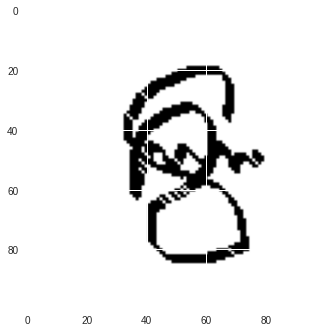

In [ ]:

from keras.preprocessing import image
import numpy as np
from tensorflow.keras.utils import load_img, img_to_array

# Pre-processing the image
img = load_img('/content/drive/MyDrive/Data tanda tangan/sakho3/gambar17.png', target_size = (100, 100,3))
img_tensor = img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis = 0)
# img_tensor = img_tensor / 255.
  
# Print image tensor shape
print(img_tensor.shape)
  
# Print image
import matplotlib.pyplot as plt
plt.imshow(img_tensor[0])
plt.show()

In [ ]:
from sys import path_hooks

def outputCNN(path,no_layer=0):
  img = load_img(path, target_size = (100, 100,3))
  img_tensor = img_to_array(img)
  img_tensor = np.expand_dims(img_tensor, axis = 0)    
    
  import matplotlib.pyplot as plt
  plt.figure(figsize=(3,3))
  plt.grid(False)
  plt.imshow(img_tensor[0])
  plt.show()

  layer_outputs = [layer.output for layer in basis.layers[1:7]]
  activation_model = Model(inputs = basis.input, outputs = layer_outputs)
  activations = activation_model.predict(img_tensor)
  print(layer_outputs[no_layer])
  # ambil aktivasi layer dgn index tertentu
  first_layer_activation = activations[no_layer]
  # liat shapenya  
  print(first_layer_activation.shape)
  
  fig, (ax1, ax2) = plt.subplots(1, 2)
  ax1.imshow(first_layer_activation[0, :, :, 0], cmap ='viridis')
  ax2.imshow(first_layer_activation[0, :, :, 1], cmap ='viridis')
  ax1.grid(False) 
  ax2.grid(False) 
  fig.show()

  # plt.figure(figsize=(3,3))
  # plt.imshow(first_layer_activation[0, :, :, 0], cmap ='viridis')
  # plt.grid(False)
  # plt.show()
  # plt.figure(figsize=(3,3))
  # plt.imshow(first_layer_activation[0, :, :, 1], cmap ='viridis')
  # plt.grid(False)
  # plt.show()

In [ ]:
from sys import path_hooks

def outputCNN2(path,model, awal,akhir):
  img = load_img(path, target_size = (100, 100,3))
  img_tensor = img_to_array(img)
  img_tensor = np.expand_dims(img_tensor, axis = 0)

  import matplotlib.pyplot as plt
  plt.figure(figsize=(3,3))
  plt.grid(False)
  plt.imshow(img_tensor[0])
  plt.show()

  layer_outputs = [layer.output for layer in model.layers]
  activation_model = Model(inputs = model.input, outputs = layer_outputs)
  activations = activation_model.predict(img_tensor)

  for i in range(awal,akhir):
    print(layer_outputs[i])
    first_layer_activation = activations[i]
    
    print(first_layer_activation.shape)
    n_channel = first_layer_activation.shape[-1]

    fig, (ax)  = plt.subplots(1, n_channel)
    for j in range(n_channel):
      ax[j].imshow(first_layer_activation[0, :, :, j], cmap ='viridis')
      ax[j].grid(False) 
      # ax[j].title(layer_outputs[i])
    fig.show()
  

In [ ]:
basis = initialize_base_network()

In [ ]:
basis.save_weights('bobot_cnn.h5')

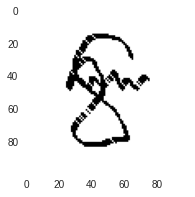

1/1 [==============================] - 0s 112ms/step
KerasTensor(type_spec=TensorSpec(shape=(None, 90, 90, 2), dtype=tf.float32, name=None), name='conv2d_54/Relu:0', description="created by layer 'conv2d_54'")
(1, 90, 90, 2)
KerasTensor(type_spec=TensorSpec(shape=(None, 44, 44, 2), dtype=tf.float32, name=None), name='max_pooling2d_46/MaxPool:0', description="created by layer 'max_pooling2d_46'")
(1, 44, 44, 2)
KerasTensor(type_spec=TensorSpec(shape=(None, 40, 40, 2), dtype=tf.float32, name=None), name='conv2d_55/Relu:0', description="created by layer 'conv2d_55'")
(1, 40, 40, 2)
KerasTensor(type_spec=TensorSpec(shape=(None, 19, 19, 2), dtype=tf.float32, name=None), name='max_pooling2d_47/MaxPool:0', description="created by layer 'max_pooling2d_47'")
(1, 19, 19, 2)
KerasTensor(type_spec=TensorSpec(shape=(None, 17, 17, 2), dtype=tf.float32, name=None), name='conv2d_56/Relu:0', description="created by layer 'conv2d_56'")
(1, 17, 17, 2)
KerasTensor(type_spec=TensorSpec(shape=(None, 8, 8, 2

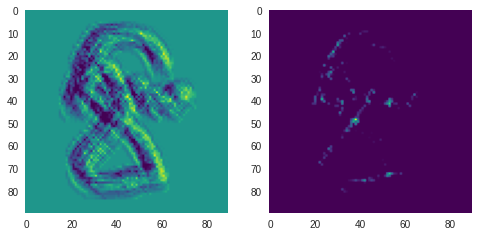

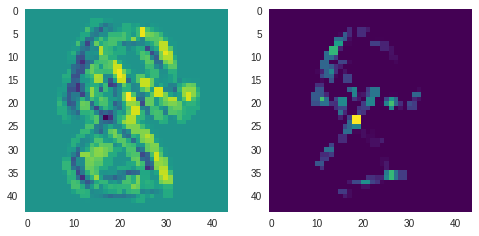

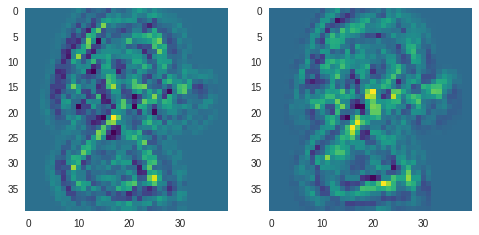

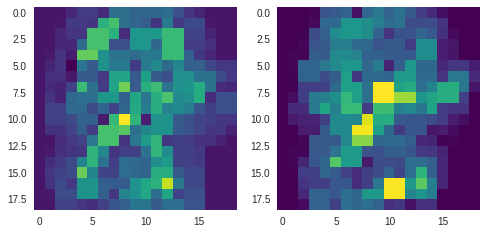

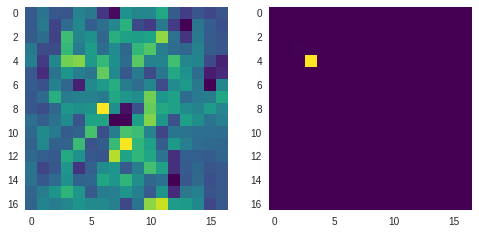

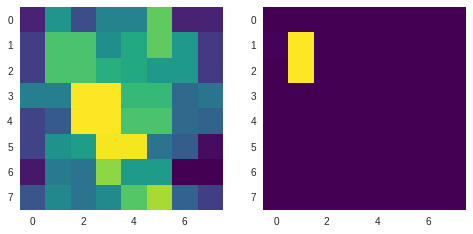

In [ ]:
outputCNN2('/content/drive/MyDrive/Data tanda tangan/sakho3/gambar11.png',model=basis, awal=1,akhir=7)

In [ ]:
mod2 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(11,input_shape=(100,100,3), kernel_size=11,activation='relu'),
    tf.keras.layers.MaxPooling2D(4),
    tf.keras.layers.Conv2D(2,input_shape=(100,100,3), kernel_size=5,activation='relu'),
])

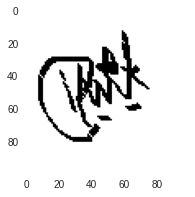

1/1 [==============================] - 0s 123ms/step
KerasTensor(type_spec=TensorSpec(shape=(None, 90, 90, 11), dtype=tf.float32, name=None), name='conv2d_28/Relu:0', description="created by layer 'conv2d_28'")
(1, 90, 90, 11)
KerasTensor(type_spec=TensorSpec(shape=(None, 22, 22, 11), dtype=tf.float32, name=None), name='max_pooling2d_21/MaxPool:0', description="created by layer 'max_pooling2d_21'")
(1, 22, 22, 11)


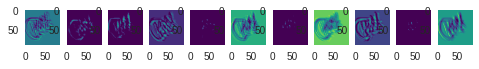

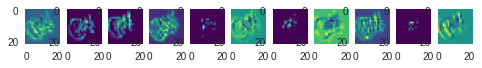

In [ ]:
outputCNN2('/content/drive/MyDrive/Data tanda tangan/Rafif/gambar10.png',model=mod2, awal=0,akhir=2)

In [ ]:
mod2.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_28 (Conv2D)          (None, 90, 90, 11)        4004      
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 22, 22, 11)       0         
 g2D)                                                            
                                                                 
 conv2d_29 (Conv2D)          (None, 18, 18, 2)         552       
                                                                 
Total params: 4,556
Trainable params: 4,556
Non-trainable params: 0
_________________________________________________________________


In [ ]:
[layer.output for layer in basis.layers[1:7]]

[<KerasTensor: shape=(None, 90, 90, 2) dtype=float32 (created by layer 'conv2d_15')>,
 <KerasTensor: shape=(None, 44, 44, 2) dtype=float32 (created by layer 'max_pooling2d_15')>,
 <KerasTensor: shape=(None, 40, 40, 2) dtype=float32 (created by layer 'conv2d_16')>,
 <KerasTensor: shape=(None, 19, 19, 2) dtype=float32 (created by layer 'max_pooling2d_16')>,
 <KerasTensor: shape=(None, 17, 17, 2) dtype=float32 (created by layer 'conv2d_17')>,
 <KerasTensor: shape=(None, 8, 8, 2) dtype=float32 (created by layer 'max_pooling2d_17')>]

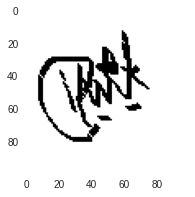

1/1 [==============================] - 0s 83ms/step
KerasTensor(type_spec=TensorSpec(shape=(None, 90, 90, 2), dtype=tf.float32, name=None), name='conv2d_18/Relu:0', description="created by layer 'conv2d_18'")
(1, 90, 90, 2)


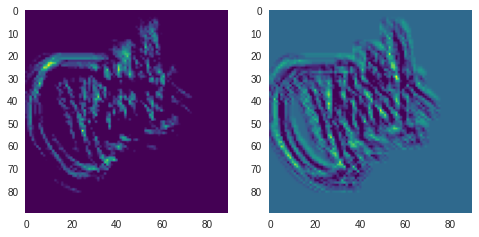

In [ ]:
outputCNN('/content/drive/MyDrive/Data tanda tangan/Rafif/gambar10.png',0)

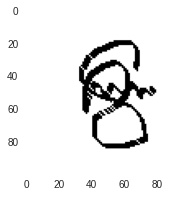

1/1 [==============================] - 0s 86ms/step
KerasTensor(type_spec=TensorSpec(shape=(None, 19, 19, 2), dtype=tf.float32, name=None), name='max_pooling2d_7/MaxPool:0', description="created by layer 'max_pooling2d_7'")
(1, 19, 19, 2)


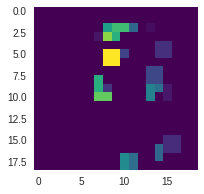

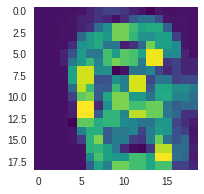

In [ ]:
outputCNN('/content/drive/MyDrive/Data tanda tangan/sakho3/gambar17.png',3)

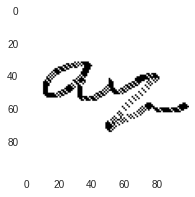

1/1 [==============================] - 0s 116ms/step
KerasTensor(type_spec=TensorSpec(shape=(None, 19, 19, 2), dtype=tf.float32, name=None), name='max_pooling2d_16/MaxPool:0', description="created by layer 'max_pooling2d_16'")
(1, 19, 19, 2)


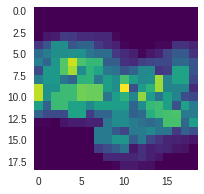

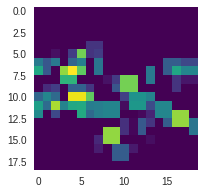

In [ ]:
outputCNN('/content/drive/MyDrive/Data tanda tangan/Angga/gambar14.png',3)

In [ ]:
def base_network():
    input = Input(shape=(100, 100, 3), name="input_gambar")
    x = tf.keras.layers.Conv2D(2, kernel_size=11, strides=1, activation='relu')(input)
    x = tf.keras.layers.MaxPooling2D(3, strides=2)(x)

    x = tf.keras.layers.Conv2D(2, kernel_size=5, strides=1, activation='relu')(x)
    x = tf.keras.layers.MaxPooling2D(3, strides=2)(x)

    x = tf.keras.layers.Conv2D(2,kernel_size=3, strides=1 ,activation='relu')(x)
    x = tf.keras.layers.MaxPooling2D(3, strides=2)(x)

    return Model(inputs=input, outputs=x)

In [ ]:
base_network = base_network()

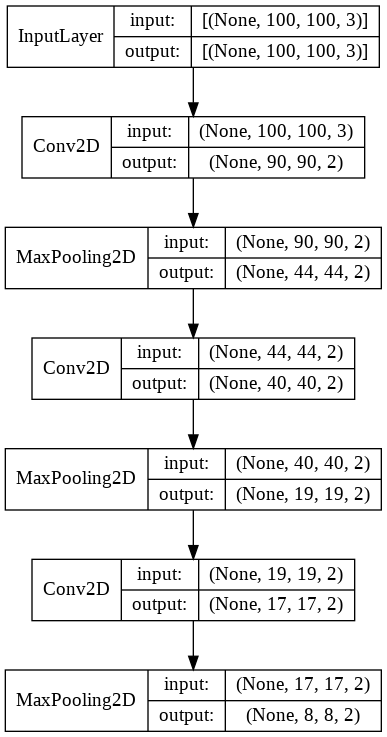

In [ ]:
plot_model(base_network, show_shapes=True, show_layer_names=False, to_file='outer-model1.png',)

In [ ]:
first_layer_activation.shape

(1, 90, 90, 2)

In [ ]:
#model.save('siamese.h5')

In [ ]:
df_test['arr_pair1']  = df_test['pair1'].apply(convertArray)
df_test['arr_pair2']  = df_test['pair2'].apply(convertArray)

In [ ]:
pair1_test = []
for i in df_test['arr_pair1']:
  pair1_test.append(i)

In [ ]:
pair2_test = []
for i in df_test['arr_pair2']:
  pair2_test.append(i)

In [ ]:
pair1_test = np.array(pair1_test).astype('float32')
pair2_test = np.array(pair2_test).astype('float32')
test_label = df_test.label.astype('float32')

In [ ]:
pair1_test.shape

(1980, 100, 100, 3)

In [ ]:
y_pred = model.predict([pair1_test,pair2_test])

62/62 [==============================] - 18s 283ms/step


In [ ]:
y_pred = y_pred.reshape(1980)
y_pred.shape

(1980,)

In [ ]:
test_label.shape


(1980,)

In [ ]:
compute_accuracy(test_label, y_pred)

1.0

In [ ]:
def bandingGambar(img1, img2, model):
  model = model
  img1 = imread(img1)
  img2 = imread(img2)
  prediksi = model.predict([img1.reshape(1,100,100,3), img2.reshape(1,100,100,3)])
  prediksi = prediksi.reshape(1)
  pred = ''
  if prediksi > 0.5:
    pred = 'tidak mirip'
  else:
    pred = 'mirip'
  plt.figure(figsize=(5,5))
  plt.imshow(img1)
  plt.figure(figsize=(5,5))
  plt.imshow(img2)
  plt.title(f'kemiripan gambar1 dan gambar2 : {pred}, skor={prediksi}')

In [ ]:
def bandingGambarv2(img1, img2, model):
  model = model
  img1 = imread(img1)
  img2 = imread(img2)
  prediksi = model.predict([img1.reshape(1,100,100,3), img2.reshape(1,100,100,3)])
  prediksi = prediksi.reshape(1)
  pred = ''
  if prediksi > 0.467:
    pred = 'tidak mirip'
  else:
    pred = 'mirip'
  fig, (ax1, ax2) = plt.subplots(1, 2)
  ax1.imshow(img1)
  ax2.imshow(img2)
  fig.suptitle(f'gambar1 dan gambar2 : {pred}, {prediksi[0]}') 
  ax1.grid(False) 
  ax2.grid(False) 
  # plt.figure(figsize=(5,5))
  # plt.imshow(img1)
  # plt.figure(figsize=(5,5))
  # plt.imshow(img2)
  # plt.title(f'gambar1 dan gambar2 : {pred}, %2f'%round(prediksi[0],3))

1/1 [==============================] - 0s 299ms/step


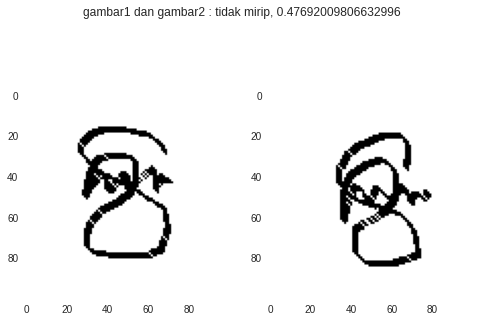

In [ ]:
bandingGambarv2(img1='/content/gambarrandom.png',img2='/content/drive/MyDrive/Data tanda tangan/sakho3/gambar17.png',model=model)

1/1 [==============================] - 0s 30ms/step


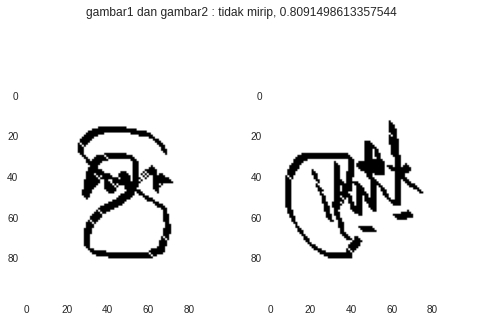

In [ ]:
bandingGambarv2(img1='/content/gambarrandom.png',img2='/content/drive/MyDrive/Data tanda tangan/Rafif/gambar10.png',model=model)

1/1 [==============================] - 0s 26ms/step


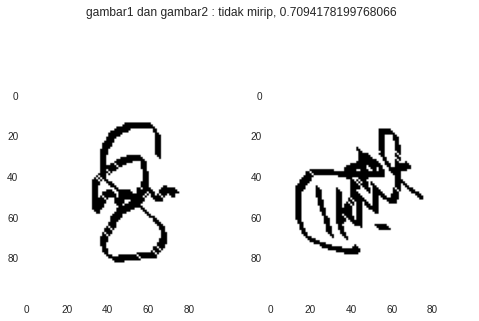

In [ ]:
bandingGambarv2(img1='/content/drive/MyDrive/Data tanda tangan/sakho3/gambar33.png',img2='/content/drive/MyDrive/Data tanda tangan/Rafif/gambar7.png',model=model)

1/1 [==============================] - 0s 27ms/step


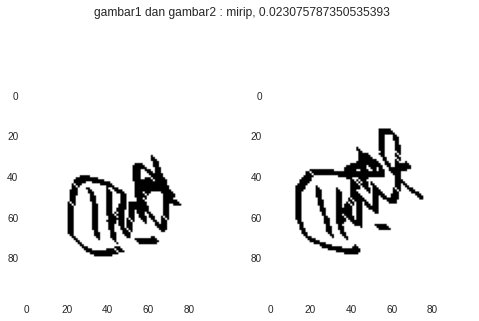

In [ ]:
bandingGambarv2(img1='/content/drive/MyDrive/Data tanda tangan/Rafif/gambar9.png',img2='/content/drive/MyDrive/Data tanda tangan/Rafif/gambar7.png',model=model)

1/1 [==============================] - 0s 30ms/step


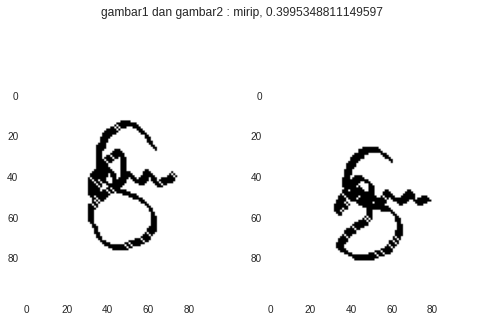

In [ ]:
bandingGambarv2(img1='/content/drive/MyDrive/Data tanda tangan/sakho3/gambar44.png',img2='/content/drive/MyDrive/Data tanda tangan/sakho3/gambar23.png',model=model)

1/1 [==============================] - 0s 35ms/step


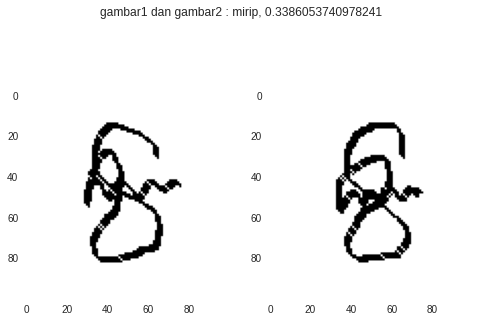

In [ ]:
bandingGambarv2(img1='/content/drive/MyDrive/Data tanda tangan/sakho3/gambar45.png',img2='/content/drive/MyDrive/Data tanda tangan/sakho3/gambar33.png',model=model)

1/1 [==============================] - 0s 85ms/step


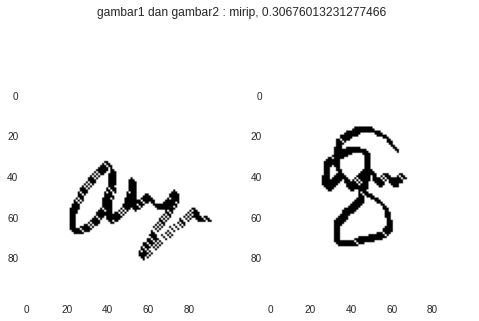

In [ ]:
bandingGambarv2(img1='/content/drive/MyDrive/Data tanda tangan/sakho3/gambar5.png',img2='/content/drive/MyDrive/Data tanda tangan/sakho3/gambar25.png',model=model)